In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-06-13 23:40:24--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 172.67.213.166, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.01s   

2020-06-13 23:40:25 (33.4 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [0]:
df = pd.read_csv("spam.csv", encoding= "ISO-8859-1")

In [54]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df.drop(['Unnamed: 2', "Unnamed: 3", "Unnamed: 4"], axis =1, inplace= True)

In [0]:
df.columns = ["Label", "Text"]

In [0]:
df["Label_index"] = df["Label"].map({"ham":1, "spam":0} )

In [58]:
df

,Label,Text,Label_index
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0
5568,ham,Will Ì_ b going to esplanade fr home?,1
5569,ham,"Pity, * was in mood for that. So...any other s...",1
5570,ham,The guy did some bitching but I acted like i'd...,1


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
texts = df["Text"].values

In [0]:
labels = df["Label_index"].values

In [79]:
x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size = 0.33)
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
print(tokenizer.word_index)
V= len(tokenizer.word_index) # length of entire vocabulary

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'of': 14, 'it': 15, 'call': 16, 'have': 17, 'on': 18, 'that': 19, '2': 20, 'are': 21, 'so': 22, 'now': 23, 'not': 24, 'but': 25, 'do': 26, 'or': 27, 'at': 28, 'can': 29, "i'm": 30, 'with': 31, 'will': 32, 'just': 33, 'be': 34, 'ur': 35, 'if': 36, 'no': 37, 'this': 38, 'get': 39, 'we': 40, 'gt': 41, 'lt': 42, 'up': 43, 'ok': 44, '4': 45, 'when': 46, 'how': 47, 'out': 48, 'what': 49, 'all': 50, 'free': 51, 'from': 52, 'then': 53, 'go': 54, 'know': 55, 'like': 56, 'got': 57, 'am': 58, 'come': 59, 'was': 60, 'only': 61, 'good': 62, 'day': 63, 'love': 64, 'time': 65, 'its': 66, 'send': 67, 'there': 68, 'want': 69, 'he': 70, 'text': 71, 'as': 72, 'still': 73, "i'll": 74, 'txt': 75, 'need': 76, 'going': 77, 'one': 78, 'about': 79, 'by': 80, 'sorry': 81, 'home': 82, 'see': 83, 'stop': 84, 'da': 85, 'mobile': 86, 'r': 87, 'n': 88, 'reply': 89, 'lor': 90, 'her': 91, 'new':

In [0]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train)
T = len(x_train[0]) #number of words in the longest sentence
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen= T)

In [0]:
D = 20 #length of word vector
M = 15 # number of hidden layers

i = tf.keras.layers.Input(shape = T)
x = tf.keras.layers.Embedding(V+1, D)(i)
x = tf.keras.layers.LSTM(M, return_sequences = True)(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model = tf.keras.models.Model(i, x)



In [0]:
model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])

In [83]:
r = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
117/117 [==============================] - 9s 76ms/step - loss: 0.4903 - accuracy: 0.8387 - val_loss: 0.3890 - val_accuracy: 0.8690
Epoch 2/10
117/117 [==============================] - 8s 73ms/step - loss: 0.3966 - accuracy: 0.8645 - val_loss: 0.3876 - val_accuracy: 0.8690
Epoch 3/10
117/117 [==============================] - 8s 72ms/step - loss: 0.3946 - accuracy: 0.8645 - val_loss: 0.3825 - val_accuracy: 0.8690
Epoch 4/10
117/117 [==============================] - 8s 71ms/step - loss: 0.3119 - accuracy: 0.8867 - val_loss: 0.1801 - val_accuracy: 0.9739
Epoch 5/10
117/117 [==============================] - 8s 72ms/step - loss: 0.1230 - accuracy: 0.9866 - val_loss: 0.1011 - val_accuracy: 0.9837
Epoch 6/10
117/117 [==============================] - 8s 73ms/step - loss: 0.0612 - accuracy: 0.9952 - val_loss: 0.0742 - val_accuracy: 0.9848
Epoch 7/10
117/117 [==============================] - 8s 72ms/step - loss: 0.0368 - accuracy: 0.9976 - val_loss: 0.0661 - val_accuracy: 0.9848

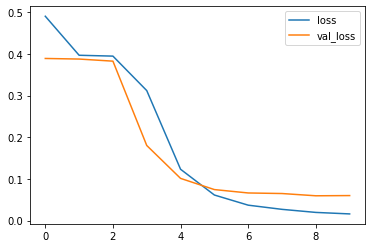

In [85]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

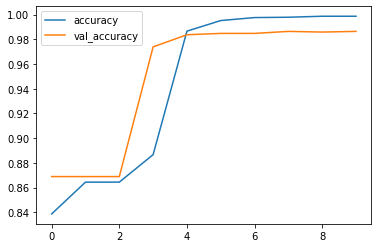

In [84]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, model.predict(x_test).reshape(-1).round()))
print(classification_report(y_test, model.predict(x_test).reshape(-1).round()))

[[ 220   21]
 [   4 1594]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       241
           1       0.99      1.00      0.99      1598

    accuracy                           0.99      1839
   macro avg       0.98      0.96      0.97      1839
weighted avg       0.99      0.99      0.99      1839

